In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
!wget https://raw.githubusercontent.com/Mehrdadghassabi/fundamental_nueral_network_course_notebooks/main/simple_linear_regression/train.txt
!wget https://raw.githubusercontent.com/Mehrdadghassabi/fundamental_nueral_network_course_notebooks/main/simple_linear_regression/test.txt

--2023-12-18 09:48:07--  https://raw.githubusercontent.com/Mehrdadghassabi/fundamental_nueral_network_course_notebooks/main/simple_linear_regression/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3223 (3.1K) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   3.15K  --.-KB/s    in 0s      

2023-12-18 09:48:07 (70.2 MB/s) - ‘train.txt’ saved [3223/3223]

--2023-12-18 09:48:07--  https://raw.githubusercontent.com/Mehrdadghassabi/fundamental_nueral_network_course_notebooks/main/simple_linear_regression/test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:4

In [6]:
def extract_data_from_file(filename):
    data_x = []
    data_y = []
    f = open(filename, "r")
    c = f.read()
    for line in c.splitlines():
        xn = float(line.split(' ')[0])
        yn = float(line.split(' ')[1])
        data_x.append(xn)
        data_y.append(yn)
    return data_x,data_y

In [7]:
train_x,train_y = extract_data_from_file("train.txt")
test_x,test_y = extract_data_from_file("test.txt")

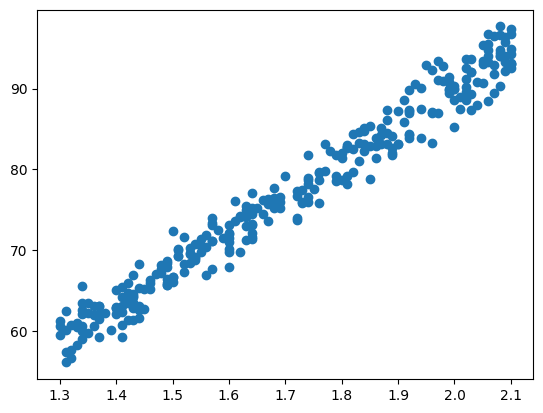

In [8]:
plt.plot(train_x, train_y,'o')
plt.show()

In [39]:
def cost(a,b):
    sum = 0
    for i in range(len(train_x)):
        y = a*train_x[i]+b
        yhat = train_y[i]
        sum += math.pow(y-yhat,2)
    return sum/len(train_x)

In [ ]:
a = 37
b = 20
print(cost(a,b))

simple linear regression:
estimating y
given x using this formula y = ax+b the close form solution is

a = (Σxy / Σx²)

b = (Σy / n) — (ΣxΣy / Σx²n)

see this for more information:
https://medium.com/@dancerworld60/deriving-simple-linear-regression-from-scratch-closed-form-solution-and-python-implementation-e0eaccb08f1

In [38]:
sigma_x2 = 0
sigma_xy = 0
sigma_x = 0
sigma_y = 0
n = len(train_x)
for i in range(len(train_x)):
      sigma_x += train_x[i]
      sigma_y += train_y[i]
      sigma_x2 += train_x[i]*train_x[i]
      sigma_xy += train_x[i]*train_y[i]
sigma_x2 /= n
sigma_xy /= n
sigma_x /= n
sigma_y /= n
a = sigma_xy/sigma_x2
b = (sigma_y/n) - ((sigma_x*sigma_y)/(sigma_x2*n))
print("a: " + str(a))
print("b: " + str(b))
print("cost: "+str(cost(a,b)))

a: 45.05636345330746
b: 0.10906131108119746
cost: 3.8949958946465997


choosing a & b randomly:

In [42]:
min_a = 100
min_b = 2
min_cost = cost(min_a,min_b)
for i in range(100):
    new_a = random.randrange(0,30)
    new_b = random.randrange(0,30)
    if cost(new_a,new_b)< min_cost:
       min_cost = cost(new_a,new_b)
       min_a = new_a
       min_b = new_b
print("a: " +str(min_a))
print("b: "+ str(min_b))
print("cost: "+ str(min_cost))

a: 28
b: 27
cost: 25.506117333333332


gradient descent:
begin with a random (a,b) and update parametre in appropriate direction

a = a - dcost/da

b = b - dcost/db

In [44]:
a = 30
b = 10
for i in range(40000):
    #print(i)
    for j in range(len(train_x)):
        y = a * train_x[j] + b
        yhat = train_y[j]
        a = a - 0.001 * 2*(y-yhat)* train_x[j]
        b = b - 0.001 * 2*(y-yhat)

print("a: " +str(a))
print("b: "+ str(b))
print("cost: "+ str(cost(a,b)))

a: 44.80980419260168
b: 0.4956241900607018
cost: 3.8843467314451336
